In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
columns = ["Image_Id","gt_total", "gt_date","gt_time", "pred_total", "pred_date", "pred_time", "conf_total", "conf_time","conf_date"]

In [4]:
df = pd.read_csv("data/Assigment 2 - Train.txt", sep="|", names=columns)
test = pd.read_csv("data/Assignment 2 - Test.txt", sep="|", names=columns)

In [5]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


In [6]:
df.isnull().sum()

Image_Id      0
gt_total      0
gt_date       0
gt_time       0
pred_total    0
pred_date     0
pred_time     0
conf_total    0
conf_time     0
conf_date     0
dtype: int64

In [7]:
# df["gt_date"].value_counts()

In [8]:
# df["gt_time"].value_counts()

In [9]:
# df["gt_total"].value_counts()

In [10]:
# df["pred_date"].value_counts()

In [11]:
# df["pred_time"].value_counts()

In [12]:
# df["pred_total"].value_counts()

In [13]:
# df[df["pred_time"] == "noTime"]

In [14]:
# test[test["pred_time"] == "noTime"]

In [15]:
time_df = df[df["pred_time"] != "noTime"]

In [16]:
time_test_df = test[test["pred_time"] != "noTime"]

In [17]:
df["gt_date"] = pd.to_datetime(df["gt_date"])
df["gt_time"] = pd.to_datetime(df["gt_time"])
df["pred_date"] = pd.to_datetime(df["pred_date"])
# df["pred_time"] = pd.to_datetime(df["pred_time"])

In [18]:
test["gt_date"] = pd.to_datetime(test["gt_date"])
test["gt_time"] = pd.to_datetime(test["gt_time"])
test["pred_date"] = pd.to_datetime(test["pred_date"])

In [19]:
df.dtypes

Image_Id               int64
gt_total               int64
gt_date       datetime64[ns]
gt_time       datetime64[ns]
pred_total             int64
pred_date     datetime64[ns]
pred_time             object
conf_total           float64
conf_time            float64
conf_date            float64
dtype: object

In [20]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,2017-07-19 13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,2017-07-19 18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,2017-07-19 15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,2017-07-19 18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,2017-07-19 13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


# Predicting Total Variable

In [21]:
total_df = df[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [22]:
test_total = test[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [23]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total
0,1,160,160,-0.001974
1,3,195,195,-0.011053
2,4,145,145,-0.002920
3,4,243,243,-0.075094
4,6,71,71,-0.014107


In [24]:
total_df["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [25]:
test_total["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [26]:
total_df["total_label"].value_counts()

1    4542
0     458
Name: total_label, dtype: int64

In [27]:
total_df["gt_total"].max()

54196

In [28]:
total_df[total_df["gt_total"]>10000]["total_label"].value_counts()

1    24
0     9
Name: total_label, dtype: int64

In [29]:
def convert_string(x):
    _str_len = 5
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [30]:
total_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label'], dtype='object')

In [31]:
total_df["gt_total"] = total_df["gt_total"].apply(convert_string)
total_df["pred_total"] = total_df["pred_total"].apply(convert_string)

In [32]:
test_total["gt_total"] = test_total["gt_total"].apply(convert_string)
test_total["pred_total"] = test_total["pred_total"].apply(convert_string)

In [33]:
total_df.dtypes

Image_Id         int64
gt_total        object
pred_total      object
conf_total     float64
total_label      int64
dtype: object

In [34]:
for pos in range(0,5):
    total_df[str(pos+1)+"_digit_gt"] = total_df["gt_total"].apply(lambda x: x[pos])
    total_df[str(pos+1)+"_digit_pred"] = total_df["pred_total"].apply(lambda x: x[pos])
    test_total[str(pos+1)+"_digit_gt"] = test_total["gt_total"].apply(lambda x: x[pos])
    test_total[str(pos+1)+"_digit_pred"] = test_total["pred_total"].apply(lambda x: x[pos])

In [35]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total,total_label,1_digit_gt,1_digit_pred,2_digit_gt,2_digit_pred,3_digit_gt,3_digit_pred,4_digit_gt,4_digit_pred,5_digit_gt,5_digit_pred
0,1,00160,00160,-0.001974,1,0,0,0,0,1,1,6,6,0,0
1,3,00195,00195,-0.011053,1,0,0,0,0,1,1,9,9,5,5
2,4,00145,00145,-0.002920,1,0,0,0,0,1,1,4,4,5,5
3,4,00243,00243,-0.075094,1,0,0,0,0,2,2,4,4,3,3
4,6,00071,00071,-0.014107,1,0,0,0,0,0,0,7,7,1,1


In [36]:
total_df["conf_total"] = total_df["conf_total"]*-1
test_total["conf_total"] = test_total["conf_total"]*-1
total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].mean())/total_df["conf_total"].std()
test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].mean())/test_total["conf_total"].std()

In [37]:
X_total = total_df.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total = total_df["total_label"]

In [38]:
X_total_test = test_total.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total_test = test_total["total_label"]

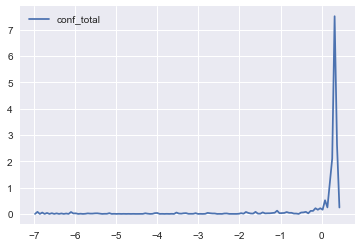

In [39]:
sns.kdeplot(X_total_test["conf_total"]*-1)

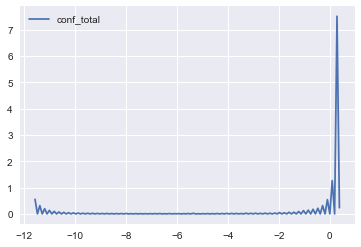

In [40]:
sns.kdeplot(X_total["conf_total"]*-1)

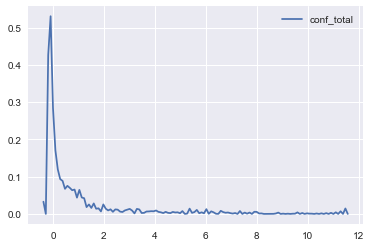

In [41]:
sns.kdeplot(X_total["conf_total"])

In [42]:
X_total.head()

,conf_total,1_digit_gt,1_digit_pred,2_digit_gt,2_digit_pred,3_digit_gt,3_digit_pred,4_digit_gt,4_digit_pred,5_digit_gt,5_digit_pred
0,-0.320969,0,0,0,0,1,1,6,6,0,0
1,-0.302947,0,0,0,0,1,1,9,9,5,5
2,-0.319091,0,0,0,0,1,1,4,4,5,5
3,-0.175824,0,0,0,0,2,2,4,4,3,3
4,-0.296886,0,0,0,0,0,0,7,7,1,1


In [43]:
X_total_test.head()

,conf_total,1_digit_gt,1_digit_pred,2_digit_gt,2_digit_pred,3_digit_gt,3_digit_pred,4_digit_gt,4_digit_pred,5_digit_gt,5_digit_pred
0,-0.347589,0,0,0,0,7,7,7,7,1,1
1,-0.321601,0,0,2,2,0,0,5,5,4,4
2,0.178602,0,0,0,0,0,0,9,2,0,0
3,-0.337672,0,0,0,0,6,6,8,8,0,0
4,-0.339796,0,0,1,1,0,0,1,1,9,9


In [44]:
X_total["conf_total"]=(X_total["conf_total"]-X_total["conf_total"].mean())/X_total["conf_total"].std()
X_total_test["conf_total"]=(X_total_test["conf_total"]-X_total_test["conf_total"].mean())/X_total_test["conf_total"].std()

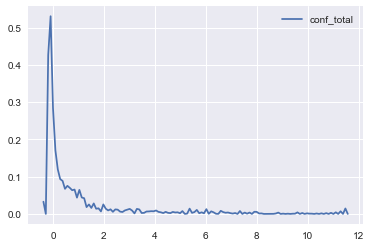

In [45]:
sns.kdeplot(X_total["conf_total"])

In [46]:
X_total_test.head()

,conf_total,1_digit_gt,1_digit_pred,2_digit_gt,2_digit_pred,3_digit_gt,3_digit_pred,4_digit_gt,4_digit_pred,5_digit_gt,5_digit_pred
0,-0.347589,0,0,0,0,7,7,7,7,1,1
1,-0.321601,0,0,2,2,0,0,5,5,4,4
2,0.178602,0,0,0,0,0,0,9,2,0,0
3,-0.337672,0,0,0,0,6,6,8,8,0,0
4,-0.339796,0,0,1,1,0,0,1,1,9,9


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_total,y_total)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [51]:
def get_scores(est, y, X):
    print("Accuracy score of model is: " + str(accuracy_score(y, est.predict(X))))
    print("F1 score of model is: " + str(f1_score(y, est.predict(X))))
    print("Precision score of model is: " + str(precision_score(y, est.predict(X))))
    print("Recall score of model is: " + str(recall_score(y, est.predict(X))))

In [52]:
get_scores(rf, y_total_test, X_total_test)

Accuracy score of model is: 0.858
F1 score of model is: 0.92274211099
Precision score of model is: 0.905982905983
Recall score of model is: 0.940133037694


In [53]:
rf.feature_importances_

array([ 0.47386458,  0.00272062,  0.00152329,  0.01906201,  0.01841532,
        0.0554489 ,  0.09525906,  0.0726869 ,  0.08877264,  0.113832  ,
        0.05841469])

In [54]:
# f1_score(y_total_test, rf.predict(X_total_test))

# precision_score(y_total_test, rf.predict(X_total_test))

# recall_score(y_total_test, rf.predict(X_total_test))

In [55]:
# clf = RandomForestClassifier()
# param_grid = { "n_estimators": list(range(100,400,50)),
#            "criterion": ["entropy"],
#            "max_depth": list(range(2,20)),
#              }
# grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, scoring="f1")
# grid_search.fit(X_total, y_total)

In [56]:
# grid_search.best_estimator_

In [57]:
# get_scores(grid_search.best_estimator_, y_total_test, X_total_test)

# Predicting Time Variable

In [58]:
time_df.head()
time_df = time_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [59]:
time_test_df = time_test_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [60]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,1,13:52:00,13:52:00,-1.180410
1,3,18:52:00,18:52:00,-0.864236
2,4,15:58:00,15:58:00,-2.266910
3,4,18:25:00,18:25:00,-0.810062
4,6,13:47:00,13:47:00,-0.664796


In [61]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,4983,22:59:00,22:59:00,-1.782610
1,4984,00:31:00,00:31:00,-0.008186
2,4987,12:50:00,12:50:00,-0.581153
3,4988,21:26:00,21:26:00,-1.665860
4,4989,22:36:00,22:36:00,-1.693240


In [62]:
time_df["gt_time"] = pd.to_datetime(time_df["gt_time"])
time_df["pred_time"] = pd.to_datetime(time_df["pred_time"])

time_test_df["gt_time"] = pd.to_datetime(time_test_df["gt_time"])
time_test_df["pred_time"] = pd.to_datetime(time_test_df["pred_time"])

In [63]:
time_df["time_label"] = time_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)
time_test_df["time_label"] = time_test_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)

In [64]:
# time_test_df[time_test_df["pred_date"] < "2016"]

# time_df[time_df["pred_date"] < "2016"]

In [65]:
# time_df["gt_time"].apply(lambda x: x.time().hour).value_counts()

In [66]:
# time_df["gt_time"].apply(lambda x: x.time().minute).value_counts()

In [67]:
def convert_hour(x):
    x = x.time().hour
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_min(x):
    x = x.time().minute
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [68]:
time_df["gt_hr_time"] = time_df["gt_time"].apply(convert_hour)
time_df["pred_hr_time"] = time_df["pred_time"].apply(convert_hour)
time_df["gt_min_time"] = time_df["gt_time"].apply(convert_min)
time_df["pred_min_time"] = time_df["pred_time"].apply(convert_min)


time_test_df["gt_hr_time"] = time_test_df["gt_time"].apply(convert_hour)
time_test_df["pred_hr_time"] = time_test_df["pred_time"].apply(convert_hour)
time_test_df["gt_min_time"] = time_test_df["gt_time"].apply(convert_min)
time_test_df["pred_min_time"] = time_test_df["pred_time"].apply(convert_min)

In [69]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,gt_hr_time,pred_hr_time,gt_min_time,pred_min_time
0,1,2017-07-19 13:52:00,2017-07-19 13:52:00,-1.180410,1,13,13,52,52
1,3,2017-07-19 18:52:00,2017-07-19 18:52:00,-0.864236,1,18,18,52,52
2,4,2017-07-19 15:58:00,2017-07-19 15:58:00,-2.266910,1,15,15,58,58
3,4,2017-07-19 18:25:00,2017-07-19 18:25:00,-0.810062,1,18,18,25,25
4,6,2017-07-19 13:47:00,2017-07-19 13:47:00,-0.664796,1,13,13,47,47


In [70]:
for pos in range(0,2):
    time_df[str(pos+1)+"_digit_hr"] = time_df["gt_hr_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_hr_pred"] = time_df["pred_hr_time"].apply(lambda x: x[pos])
    
    time_df[str(pos+1)+"_digit_min"] = time_df["gt_min_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_min_pred"] = time_df["pred_min_time"].apply(lambda x: x[pos])
    
    
    
    time_test_df[str(pos+1)+"_digit_hr"] = time_test_df["gt_hr_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_hr_pred"] = time_test_df["pred_hr_time"].apply(lambda x: x[pos])
    
    time_test_df[str(pos+1)+"_digit_min"] = time_test_df["gt_min_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_min_pred"] = time_test_df["pred_min_time"].apply(lambda x: x[pos])

In [71]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,gt_hr_time,pred_hr_time,gt_min_time,pred_min_time,1_digit_hr,1_digit_hr_pred,1_digit_min,1_digit_min_pred,2_digit_hr,2_digit_hr_pred,2_digit_min,2_digit_min_pred
0,1,2017-07-19 13:52:00,2017-07-19 13:52:00,-1.180410,1,13,13,52,52,1,1,5,5,3,3,2,2
1,3,2017-07-19 18:52:00,2017-07-19 18:52:00,-0.864236,1,18,18,52,52,1,1,5,5,8,8,2,2
2,4,2017-07-19 15:58:00,2017-07-19 15:58:00,-2.266910,1,15,15,58,58,1,1,5,5,5,5,8,8
3,4,2017-07-19 18:25:00,2017-07-19 18:25:00,-0.810062,1,18,18,25,25,1,1,2,2,8,8,5,5
4,6,2017-07-19 13:47:00,2017-07-19 13:47:00,-0.664796,1,13,13,47,47,1,1,4,4,3,3,7,7


In [72]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,gt_hr_time,pred_hr_time,gt_min_time,pred_min_time,1_digit_hr,1_digit_hr_pred,1_digit_min,1_digit_min_pred,2_digit_hr,2_digit_hr_pred,2_digit_min,2_digit_min_pred
0,4983,2017-07-19 22:59:00,2017-07-19 22:59:00,-1.782610,1,22,22,59,59,2,2,5,5,2,2,9,9
1,4984,2017-07-19 00:31:00,2017-07-19 00:31:00,-0.008186,1,00,00,31,31,0,0,3,3,0,0,1,1
2,4987,2017-07-19 12:50:00,2017-07-19 12:50:00,-0.581153,1,12,12,50,50,1,1,5,5,2,2,0,0
3,4988,2017-07-19 21:26:00,2017-07-19 21:26:00,-1.665860,1,21,21,26,26,2,2,2,2,1,1,6,6
4,4989,2017-07-19 22:36:00,2017-07-19 22:36:00,-1.693240,1,22,22,36,36,2,2,3,3,2,2,6,6


In [73]:
time_df["conf_time"] = time_df["conf_time"]*-1
time_test_df["conf_time"] = time_test_df["conf_time"]*-1
time_df["conf_time"]=(time_df["conf_time"]-time_df["conf_time"].mean())/time_df["conf_time"].std()
time_test_df["conf_time"]=(time_test_df["conf_time"]-time_test_df["conf_time"].mean())/time_test_df["conf_time"].std()

In [74]:
X_time = time_df.drop(["Image_Id", "gt_time", "pred_time", "gt_hr_time", "pred_hr_time", "gt_min_time", "pred_min_time", "time_label"],axis=1)
X_time_test = time_test_df.drop(["Image_Id", "gt_time", "pred_time", "gt_hr_time", "pred_hr_time", "gt_min_time", "pred_min_time", "time_label"],axis=1)

In [75]:
X_time.head()

,conf_time,1_digit_hr,1_digit_hr_pred,1_digit_min,1_digit_min_pred,2_digit_hr,2_digit_hr_pred,2_digit_min,2_digit_min_pred
0,0.559181,1,1,5,5,3,3,2,2
1,0.037531,1,1,5,5,8,8,2,2
2,2.351778,1,1,5,5,5,5,8,8
3,-0.051849,1,1,2,2,8,8,5,5
4,-0.291521,1,1,4,4,3,3,7,7


In [76]:
X_time_test.head()

,conf_time,1_digit_hr,1_digit_hr_pred,1_digit_min,1_digit_min_pred,2_digit_hr,2_digit_hr_pred,2_digit_min,2_digit_min_pred
0,1.709258,2,2,5,5,2,2,9,9
1,-1.413284,0,0,3,3,0,0,1,1
2,-0.405006,1,1,5,5,2,2,0,0
3,1.503807,2,2,2,2,1,1,6,6
4,1.551989,2,2,3,3,2,2,6,6


In [77]:
y_time = time_df["time_label"]
y_time_test = time_test_df["time_label"]

In [78]:
rf_time = RandomForestClassifier()

In [79]:
rf_time.fit(X_time,y_time)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [80]:
get_scores(rf_time, y_time_test, X_time_test)

Accuracy score of model is: 0.9625
F1 score of model is: 0.978102189781
Precision score of model is: 0.959427207637
Recall score of model is: 0.997518610422


In [81]:
rf_time.feature_importances_

array([ 0.13384059,  0.09891302,  0.04702648,  0.12325527,  0.0651326 ,
        0.13573163,  0.08171491,  0.22653671,  0.08784879])

# Predicting Date Variable

In [82]:
df.columns

Index(['Image_Id', 'gt_total', 'gt_date', 'gt_time', 'pred_total', 'pred_date',
       'pred_time', 'conf_total', 'conf_time', 'conf_date'],
      dtype='object')

In [83]:
date_df = df[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [84]:
date_df_test = test[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [85]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date
0,1,2016-09-11,2016-03-11,-0.008496
1,3,2016-09-23,2016-09-23,-0.018932
2,4,2016-10-02,2017-10-18,-0.978772
3,4,2016-09-26,2017-09-26,-0.123047
4,6,2016-09-19,2016-08-19,-0.003986


In [86]:
date_df["gt_date"] = pd.to_datetime(date_df["gt_date"])
date_df["pred_date"] = pd.to_datetime(date_df["pred_date"])

date_df_test["gt_date"] = pd.to_datetime(date_df_test["gt_date"])
date_df_test["pred_date"] = pd.to_datetime(date_df_test["pred_date"])

In [87]:
def convert_mon(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_day(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

def convert_year(x):
    x = str(x)
    _str_len = 2
    return str(str(x)[2:])

In [88]:
date_df["gt_mon"] = pd.DatetimeIndex(date_df["gt_date"]).month
date_df["gt_day"] = pd.DatetimeIndex(date_df["gt_date"]).day
date_df["gt_year"] = pd.DatetimeIndex(date_df["gt_date"]).year

date_df_test["gt_mon"] = pd.DatetimeIndex(date_df_test["gt_date"]).month
date_df_test["gt_day"] = pd.DatetimeIndex(date_df_test["gt_date"]).day
date_df_test["gt_year"] = pd.DatetimeIndex(date_df_test["gt_date"]).year

In [89]:
date_df["pred_mon"] = pd.DatetimeIndex(date_df["pred_date"]).month
date_df["pred_day"] = pd.DatetimeIndex(date_df["pred_date"]).day
date_df["pred_year"] = pd.DatetimeIndex(date_df["pred_date"]).year

date_df_test["pred_mon"] = pd.DatetimeIndex(date_df_test["pred_date"]).month
date_df_test["pred_day"] = pd.DatetimeIndex(date_df_test["pred_date"]).day
date_df_test["pred_year"] = pd.DatetimeIndex(date_df_test["pred_date"]).year

In [90]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,gt_mon,gt_day,gt_year,pred_mon,pred_day,pred_year
0,1,2016-09-11,2016-03-11,-0.008496,9,11,2016,3,11,2016
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,9,23,2016
2,4,2016-10-02,2017-10-18,-0.978772,10,2,2016,10,18,2017
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2016,9,26,2017
4,6,2016-09-19,2016-08-19,-0.003986,9,19,2016,8,19,2016


In [91]:
date_df["gt_mon_date"] = date_df["gt_mon"].apply(convert_mon)
date_df["pred_mon_date"] = date_df["pred_mon"].apply(convert_mon)
date_df["gt_day_date"] = date_df["gt_day"].apply(convert_day)
date_df["pred_day_date"] = date_df["pred_day"].apply(convert_day)
date_df["gt_year_date"] = date_df["gt_year"].apply(convert_year)
date_df["pred_year_date"] = date_df["pred_year"].apply(convert_year)



date_df_test["gt_mon_date"] = date_df_test["gt_mon"].apply(convert_mon)
date_df_test["pred_mon_date"] = date_df_test["pred_mon"].apply(convert_mon)
date_df_test["gt_day_date"] = date_df_test["gt_day"].apply(convert_day)
date_df_test["pred_day_date"] = date_df_test["pred_day"].apply(convert_day)
date_df_test["gt_year_date"] = date_df_test["gt_date"].apply(convert_year)
date_df_test["pred_year_date"] = date_df_test["gt_year"].apply(convert_year)


In [92]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,gt_mon,gt_day,gt_year,pred_mon,pred_day,pred_year,gt_mon_date,pred_mon_date,gt_day_date,pred_day_date,gt_year_date,pred_year_date
0,1,2016-09-11,2016-03-11,-0.008496,9,11,2016,3,11,2016,09,03,11,11,16,16
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,9,23,2016,09,09,23,23,16,16
2,4,2016-10-02,2017-10-18,-0.978772,10,2,2016,10,18,2017,10,10,02,18,16,17
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2016,9,26,2017,09,09,26,26,16,17
4,6,2016-09-19,2016-08-19,-0.003986,9,19,2016,8,19,2016,09,08,19,19,16,16


In [93]:
date_df["day_label"] = date_df.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)
date_df_test["day_label"] = date_df_test.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)

In [94]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,gt_mon,gt_day,gt_year,pred_mon,pred_day,pred_year,gt_mon_date,pred_mon_date,gt_day_date,pred_day_date,gt_year_date,pred_year_date,day_label
0,1,2016-09-11,2016-03-11,-0.008496,9,11,2016,3,11,2016,09,03,11,11,16,16,0
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,9,23,2016,09,09,23,23,16,16,1
2,4,2016-10-02,2017-10-18,-0.978772,10,2,2016,10,18,2017,10,10,02,18,16,17,0
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2016,9,26,2017,09,09,26,26,16,17,0
4,6,2016-09-19,2016-08-19,-0.003986,9,19,2016,8,19,2016,09,08,19,19,16,16,0


In [95]:
for pos in range(0,2):
    date_df[str(pos+1)+"_digit_day"] = date_df["gt_day_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_day_pred"] = date_df["pred_day_date"].apply(lambda x: x[pos])
    
    date_df[str(pos+1)+"_digit_mon"] = date_df["gt_mon_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_mon_pred"] = date_df["pred_mon_date"].apply(lambda x: x[pos])
    
    date_df[str(pos+1)+"_digit_yr"] = date_df["gt_year_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_yr_pred"] = date_df["pred_year_date"].apply(lambda x: x[pos])
    
    
    date_df_test[str(pos+1)+"_digit_day"] = date_df_test["gt_day_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_day_pred"] = date_df_test["pred_day_date"].apply(lambda x: x[pos])
    
    date_df_test[str(pos+1)+"_digit_mon"] = date_df_test["gt_mon_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_mon_pred"] = date_df_test["pred_mon_date"].apply(lambda x: x[pos])
    
    date_df_test[str(pos+1)+"_digit_yr"] = date_df_test["gt_year_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_yr_pred"] = date_df_test["pred_year_date"].apply(lambda x: x[pos])

In [96]:
date_df["conf_date"] = date_df["conf_date"]*-1
date_df_test["conf_date"] = date_df_test["conf_date"]*-1
date_df["conf_date"]=(date_df["conf_date"]-date_df["conf_date"].mean())/date_df["conf_date"].std()
date_df_test["conf_date"]=(date_df_test["conf_date"]-date_df_test["conf_date"].mean())/date_df_test["conf_date"].std()

In [97]:
X_date = date_df.drop(["Image_Id", "gt_date", "pred_date", "gt_mon", "gt_day", "gt_year", "pred_mon", "pred_day",\
                      "pred_year", "gt_mon_date", "pred_mon_date", "gt_day_date", "pred_day_date",\
                      "gt_year_date", "pred_year_date", "day_label"], axis=1)
X_date_test = date_df_test.drop(["Image_Id", "gt_date", "pred_date", "gt_mon", "gt_day", "gt_year", "pred_mon", "pred_day",\
                      "pred_year", "gt_mon_date", "pred_mon_date", "gt_day_date", "pred_day_date",\
                      "gt_year_date", "pred_year_date", "day_label"], axis=1)

In [98]:
y_date = date_df["day_label"]
y_date_test = date_df_test["day_label"]

In [99]:
X_date.head()

,conf_date,1_digit_day,1_digit_day_pred,1_digit_mon,1_digit_mon_pred,1_digit_yr,1_digit_yr_pred,2_digit_day,2_digit_day_pred,2_digit_mon,2_digit_mon_pred,2_digit_yr,2_digit_yr_pred
0,-0.428124,1,1,0,0,1,1,1,1,9,3,6,6
1,-0.420424,2,2,0,0,1,1,3,3,9,9,6,6
2,0.287783,0,1,1,1,1,1,2,8,0,0,6,7
3,-0.343604,2,2,0,0,1,1,6,6,9,9,6,7
4,-0.431451,1,1,0,0,1,1,9,9,9,8,6,6


In [100]:
rf_date = RandomForestClassifier()

In [101]:
rf_date.fit(X_date, y_date)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [102]:
X_date.head()

,conf_date,1_digit_day,1_digit_day_pred,1_digit_mon,1_digit_mon_pred,1_digit_yr,1_digit_yr_pred,2_digit_day,2_digit_day_pred,2_digit_mon,2_digit_mon_pred,2_digit_yr,2_digit_yr_pred
0,-0.428124,1,1,0,0,1,1,1,1,9,3,6,6
1,-0.420424,2,2,0,0,1,1,3,3,9,9,6,6
2,0.287783,0,1,1,1,1,1,2,8,0,0,6,7
3,-0.343604,2,2,0,0,1,1,6,6,9,9,6,7
4,-0.431451,1,1,0,0,1,1,9,9,9,8,6,6


In [103]:
X_date_test.head()

,conf_date,1_digit_day,1_digit_day_pred,1_digit_mon,1_digit_mon_pred,1_digit_yr,1_digit_yr_pred,2_digit_day,2_digit_day_pred,2_digit_mon,2_digit_mon_pred,2_digit_yr,2_digit_yr_pred
0,-0.409203,2,2,0,0,1,1,9,8,9,8,6,6
1,-0.412517,2,2,0,0,1,1,5,5,9,9,6,6
2,-0.374745,1,1,0,0,1,1,3,3,9,8,6,6
3,-0.366527,1,1,0,0,1,1,0,3,9,8,6,6
4,-0.413474,2,2,0,0,1,1,1,8,9,9,6,6


In [104]:
get_scores(rf_date, y_date_test, X_date_test)

Accuracy score of model is: 0.88
F1 score of model is: 0.770992366412
Precision score of model is: 0.63125
Recall score of model is: 0.990196078431


In [105]:
rf_date.feature_importances_

array([ 0.06311934,  0.03755626,  0.08441184,  0.02099878,  0.0216175 ,
        0.        ,  0.        ,  0.09528611,  0.11803033,  0.02122552,
        0.26331288,  0.        ,  0.27444143])

In [106]:
for col in X_date:
    print(len(X_date[col].unique()))

4914
4
4
2
2
1
1
10
10
2
9
1
2


# Predicting All At Once

In [107]:
all_df = pd.merge(total_df, time_df, left_on='Image_Id', right_on='Image_Id')
all_df = pd.merge(all_df, date_df, left_on='Image_Id', right_on='Image_Id')

all_test_df = pd.merge(test_total, time_test_df, left_on='Image_Id', right_on='Image_Id')
all_test_df = pd.merge(all_test_df, date_df_test, left_on='Image_Id', right_on='Image_Id')

In [108]:
all_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label',
       '1_digit_gt', '1_digit_pred', '2_digit_gt', '2_digit_pred',
       '3_digit_gt', '3_digit_pred', '4_digit_gt', '4_digit_pred',
       '5_digit_gt', '5_digit_pred', 'gt_time', 'pred_time', 'conf_time',
       'time_label', 'gt_hr_time', 'pred_hr_time', 'gt_min_time',
       'pred_min_time', '1_digit_hr', '1_digit_hr_pred', '1_digit_min',
       '1_digit_min_pred', '2_digit_hr', '2_digit_hr_pred', '2_digit_min',
       '2_digit_min_pred', 'gt_date', 'pred_date', 'conf_date', 'gt_mon',
       'gt_day', 'gt_year', 'pred_mon', 'pred_day', 'pred_year', 'gt_mon_date',
       'pred_mon_date', 'gt_day_date', 'pred_day_date', 'gt_year_date',
       'pred_year_date', 'day_label', '1_digit_day', '1_digit_day_pred',
       '1_digit_mon', '1_digit_mon_pred', '1_digit_yr', '1_digit_yr_pred',
       '2_digit_day', '2_digit_day_pred', '2_digit_mon', '2_digit_mon_pred',
       '2_digit_yr', '2_digit_yr_pred'],
      dtype='

In [109]:
all_df = all_df[['Image_Id', '1_digit_gt', '1_digit_pred', '2_digit_gt', '2_digit_pred',
       '3_digit_gt', '3_digit_pred', '4_digit_gt', '4_digit_pred',
       '5_digit_gt', '5_digit_pred', 'conf_total', '1_digit_hr', '1_digit_hr_pred', '1_digit_min',
       '1_digit_min_pred', '2_digit_hr', '2_digit_hr_pred', '2_digit_min',
       '2_digit_min_pred', 'conf_time', '1_digit_day', '1_digit_day_pred',
       '1_digit_mon', '1_digit_mon_pred', '1_digit_yr', '1_digit_yr_pred',
       '2_digit_day', '2_digit_day_pred', '2_digit_mon', '2_digit_mon_pred',
       '2_digit_yr', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]

all_test_df = all_test_df[['Image_Id', '1_digit_gt', '1_digit_pred', '2_digit_gt', '2_digit_pred',
       '3_digit_gt', '3_digit_pred', '4_digit_gt', '4_digit_pred',
       '5_digit_gt', '5_digit_pred', 'conf_total', '1_digit_hr', '1_digit_hr_pred', '1_digit_min',
       '1_digit_min_pred', '2_digit_hr', '2_digit_hr_pred', '2_digit_min',
       '2_digit_min_pred', 'conf_time', '1_digit_day', '1_digit_day_pred',
       '1_digit_mon', '1_digit_mon_pred', '1_digit_yr', '1_digit_yr_pred',
       '2_digit_day', '2_digit_day_pred', '2_digit_mon', '2_digit_mon_pred',
       '2_digit_yr', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]

In [110]:
all_df["all_label"] = all_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [111]:
all_test_df["all_label"] = all_test_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [112]:
len(all_df.columns)

38

In [113]:
len(all_test_df.columns)

38

In [114]:
all_df = all_df.drop(["total_label", "time_label", "day_label"], axis=1)
all_test_df = all_test_df.drop(["total_label", "time_label", "day_label"], axis=1)

In [115]:
X_all = all_df.drop(["all_label"], axis=1)
X_all_test = all_test_df.drop(["all_label"], axis=1)

y_all = all_df["all_label"]
y_test_all = all_test_df["all_label"]

In [116]:
rf_all = RandomForestClassifier()

In [117]:
rf_all.fit(X_all, y_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [118]:
get_scores(rf_all, y_test_all, X_all_test)

Accuracy score of model is: 0.827195467422
F1 score of model is: 0.512
Precision score of model is: 0.48590021692
Recall score of model is: 0.541062801932


In [119]:
rf_all.feature_importances_

array([ 0.04764356,  0.0009428 ,  0.00043481,  0.00999904,  0.00796268,
        0.01800577,  0.01675331,  0.02085513,  0.02096575,  0.01883832,
        0.01708782,  0.06120409,  0.00781205,  0.00958635,  0.02005539,
        0.01880309,  0.02316477,  0.02267776,  0.02624215,  0.02430795,
        0.05441418,  0.02116083,  0.03705106,  0.00214301,  0.02358904,
        0.        ,  0.        ,  0.04107078,  0.05080872,  0.00771021,
        0.17192673,  0.        ,  0.12558932,  0.07119354])